In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.
/Users/karanuppal/anaconda/envs/gl-env/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
train_file = "train.csv"
test_file = "test.csv"

raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [4]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [6]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=20),
                           steps_per_epoch=500,
                           epochs=200, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Epoch 1/200
42s - loss: 0.3508 - acc: 0.9050 - val_loss: 0.0964 - val_acc: 0.9738
Epoch 2/200
41s - loss: 0.2068 - acc: 0.9423 - val_loss: 0.0745 - val_acc: 0.9802
Epoch 3/200
40s - loss: 0.1756 - acc: 0.9510 - val_loss: 0.0617 - val_acc: 0.9824
Epoch 4/200
42s - loss: 0.1588 - acc: 0.9566 - val_loss: 0.0474 - val_acc: 0.9855
Epoch 5/200
58s - loss: 0.1367 - acc: 0.9608 - val_loss: 0.0463 - val_acc: 0.9860
Epoch 6/200
43s - loss: 0.1364 - acc: 0.9608 - val_loss: 0.0368 - val_acc: 0.9883
Epoch 7/200
43s - loss: 0.1060 - acc: 0.9714 - val_loss: 0.0322 - val_acc: 0.9929
Epoch 8/200
48s - loss: 0.1142 - acc: 0.9693 - val_loss: 0.0329 - val_acc: 0.9902
Epoch 9/200
41s - loss: 0.1001 - acc: 0.9720 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 10/200
50s - loss: 0.1104 - acc: 0.9686 - val_loss: 0.0318 - val_acc: 0.9907
Epoch 11/200
49s - loss: 0.0932 - acc: 0.9731 - val_loss: 0.0253 - val_acc: 0.9931
Epoch 12/200
43s - loss: 0.0875 - acc: 0.9743 - val_loss: 0.0297 - val_acc: 0.9905
Epoch 13/200


In [7]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))


Final loss: 0.0191, final accuracy: 0.9940


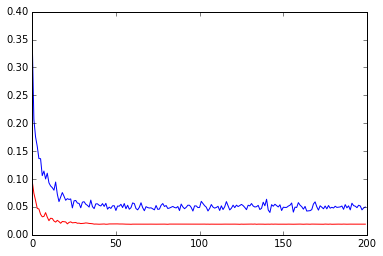

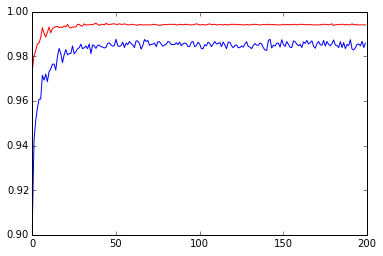

In [8]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [9]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[379   0   0   0   0   0   0   0   0   0]
 [  0 496   0   0   0   0   1   0   2   0]
 [  0   1 409   0   0   0   0   1   1   1]
 [  0   0   0 449   0   2   0   1   0   0]
 [  0   0   0   0 372   0   0   0   0   1]
 [  0   0   0   0   0 396   3   0   0   0]
 [  0   0   0   0   0   0 426   0   1   0]
 [  0   2   1   0   0   0   0 429   0   1]
 [  0   0   0   0   1   0   0   0 398   2]
 [  0   0   0   0   2   0   0   1   0 421]]


['acc', 'loss', 'val_acc', 'val_loss']


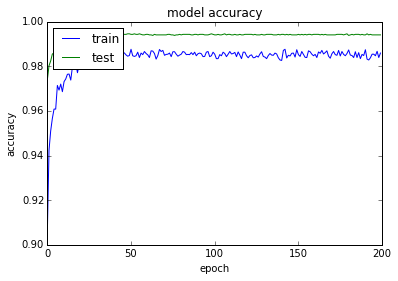

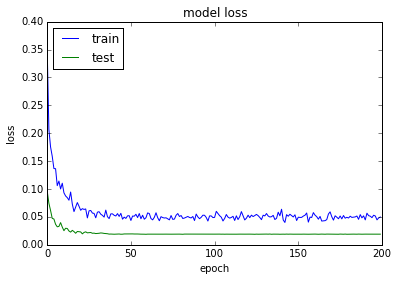

In [11]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()